# BitPredict 💰📈

![Bitcoin](https://img.odcdn.com.br/wp-content/uploads/2023/04/Destaque-roubo-criptomoedas.jpg)

In [1]:
# Some imports
import os
import sys
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf



# Dodaj folder 'src' do sys.path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

## Get Data

In [3]:
# Load data
df = pd.read_csv('/content/BTC-USD.csv',
                 parse_dates = ['Date'],
                 index_col = ['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
# Check length
print(f'Bitcoin DataFrame length: {len(df)}')

Bitcoin DataFrame length: 3461


In [5]:
# Check info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3461 entries, 2014-09-17 to 2024-03-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3461 non-null   float64
 1   High       3461 non-null   float64
 2   Low        3461 non-null   float64
 3   Close      3461 non-null   float64
 4   Adj Close  3461 non-null   float64
 5   Volume     3461 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 189.3 KB
None


In [6]:
# Check shape
print(f'Shape of the DataFrame: {df.shape}')

Shape of the DataFrame: (3461, 6)


In [7]:
# Import only Price
bitcoin_price = pd.DataFrame(df['Close']).rename(columns = {'Close': 'Price'})
bitcoin_price.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [8]:
# Get data array
timesteps = bitcoin_price.index.to_numpy()
prices = bitcoin_price['Price'].to_numpy()

timesteps[:5], prices[:5]

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
        '2014-09-19T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
        '2014-09-21T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014]))

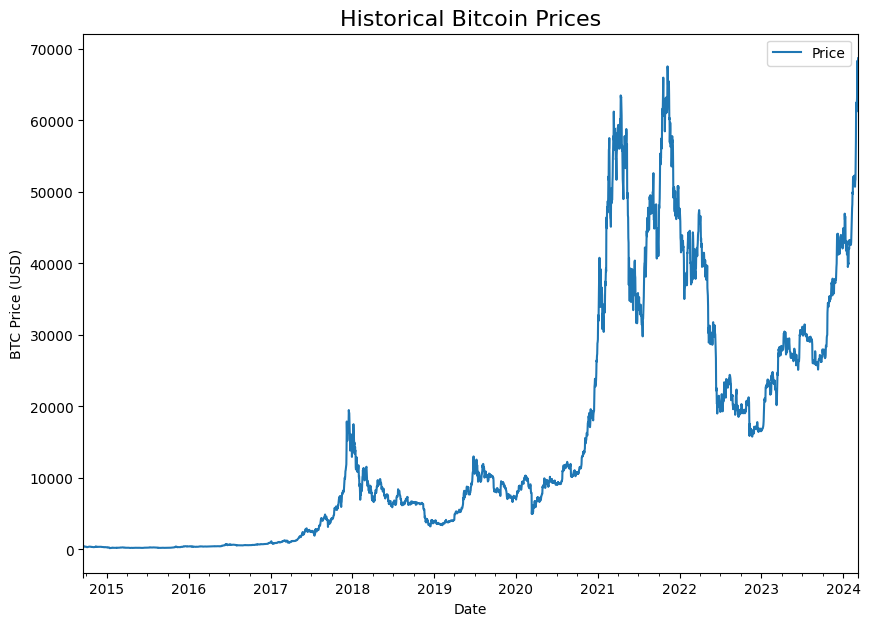

In [9]:
# See our data
bitcoin_price.plot(figsize = (10, 7))
plt.ylabel('BTC Price (USD)')
plt.title('Historical Bitcoin Prices', fontsize = 16);

## Train & Test Split

In [10]:
# Split bitcoin data
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2768, 693, 2768, 693)

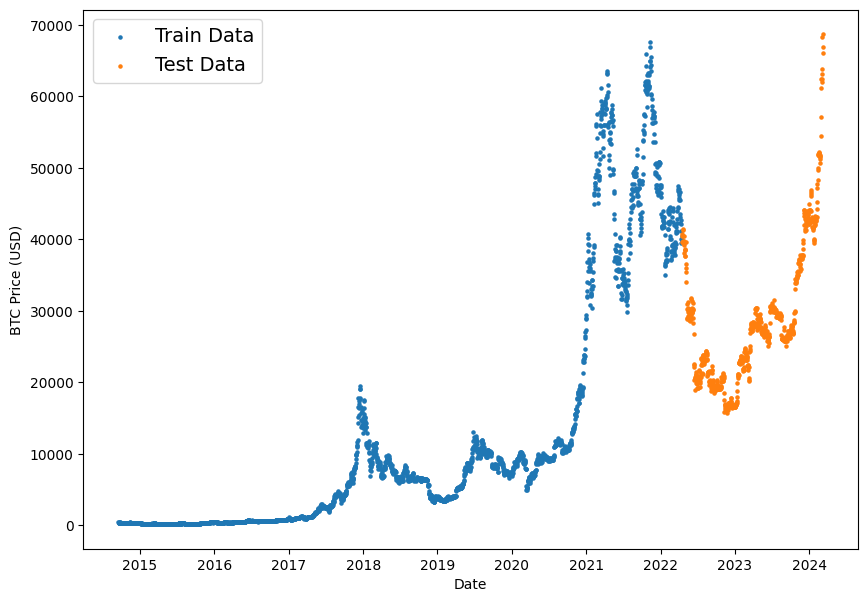

In [11]:
# Plot train and test sets
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, s = 5, label = 'Train Data')
plt.scatter(X_test, y_test, s = 5, label = 'Test Data')
plt.xlabel('Date')
plt.ylabel('BTC Price (USD)')
plt.legend(fontsize = 14)
plt.show();

In [12]:
# import sys
# import os

# # Dodaj folder 'src' do sys.path
# sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# from visualization.plotting_functions import plot_time_series

## Plotting Function

In [13]:
# Create function to plot time series
def plot_time_series(timesteps, values, format = '.', start = 0, end = None, label = None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price (USD)")
  if label:
    plt.legend(fontsize = 14) # make label bigger
  plt.grid(True);

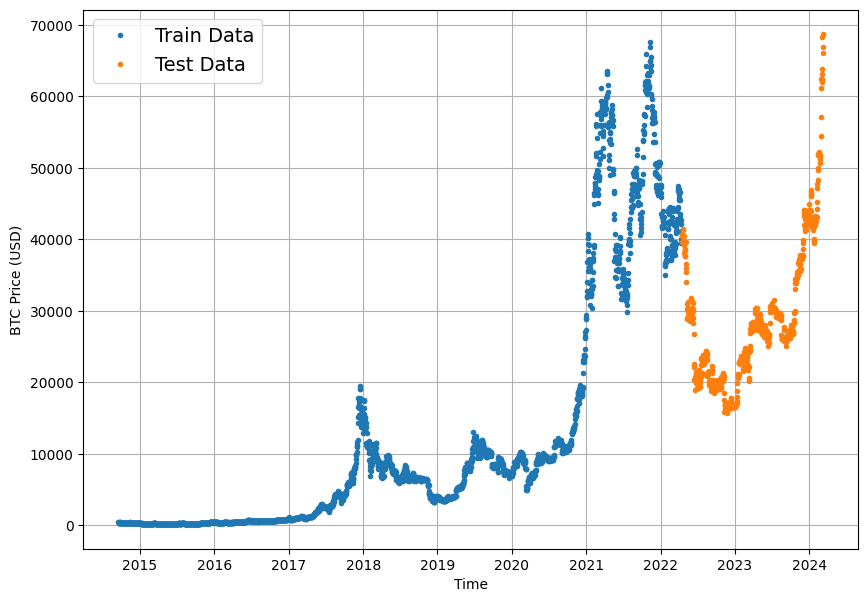

In [14]:
# Try this function
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_train,
                 values = y_train,
                 label = 'Train Data')
plot_time_series(timesteps = X_test,
                 values = y_test,
                 label = 'Test Data');

## Modelling Experiments

Modelling experiments:
* 0 Naive model
* 1 Dense model (horizon = 1, window = 7)
* 2 Dense model (horizon = 1, window = 30)
* 3 Dense model (horizon = 7, window = 30)
* 4 Conv1D Neural network
* 5 LSTM Neural network
* 6 Dense model with multivariate data (horizon = 1, window = 7)
* 7 N-BEATs Algorithm
* 8 Ensemble model (multiple models)

## Model 0: Naive Model

In [15]:
# Check testing data
y_test[:10], y_test[-10:]

(array([40424.484375, 39716.953125, 40826.214844, 41502.75    ,
        41374.378906, 40527.363281, 39740.320313, 39486.730469,
        39469.292969, 40458.308594]),
 array([62504.789063, 61198.382813, 62440.632813, 62029.847656,
        63167.371094, 68330.414063, 63801.199219, 66106.804688,
        66925.484375, 68707.796875]))

In [16]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([40424.484375, 39716.953125, 40826.214844, 41502.75    ,
        41374.378906, 40527.363281, 39740.320313, 39486.730469,
        39469.292969, 40458.308594]),
 array([57085.371094, 62504.789063, 61198.382813, 62440.632813,
        62029.847656, 63167.371094, 68330.414063, 63801.199219,
        66106.804688, 66925.484375]))

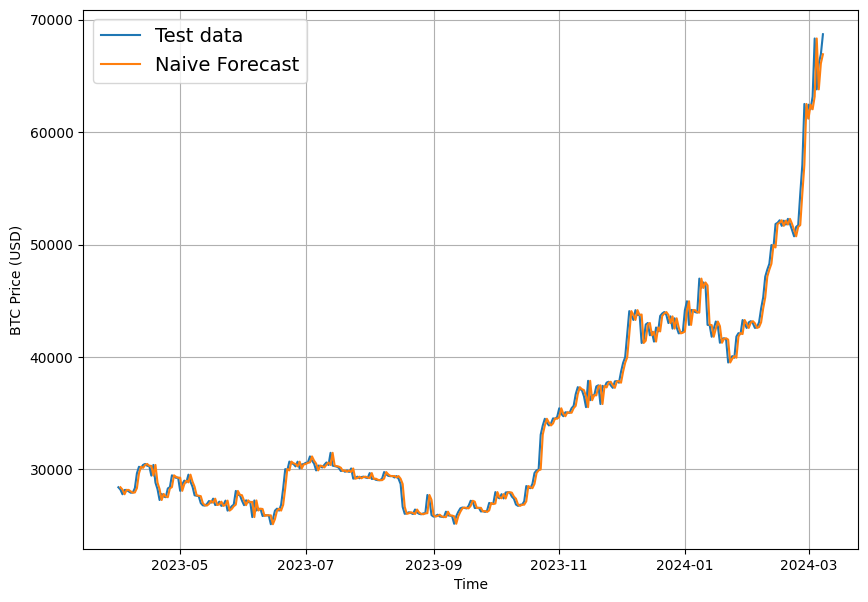

In [17]:
# Plot naive forecast
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test, values = y_test, start = 350, format = '-', label = 'Test data')
plot_time_series(timesteps = X_test[1:], values = naive_forecast, start = 350, format = '-', label = 'Naive Forecast')

### Evaluation

In [18]:
# MASE error
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (Mean Absolute Scaled Error) formula.
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Naive forecast
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # naive forecast without seasonality

  return mae / mae_naive_no_season

In [19]:
# Create function which take preditions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype = tf.float32)
    y_pred = tf.cast(y_pred, dtype = tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {
        "Mean Absolute Error": mae.numpy(),
        "Mean Squared Error": mse.numpy(),
        "Root Mean Squared Error": rmse.numpy(),
        "Mean Absolute Percentage Error": mape.numpy(),
        "Mean Absolute Scaled Error": mase.numpy()
    }

In [20]:
# Evaluate naive forecast
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred = naive_forecast)
naive_results

{'Mean Absolute Error': 530.3807,
 'Mean Squared Error': 723649.7,
 'Root Mean Squared Error': 850.676,
 'Mean Absolute Percentage Error': 1.8382432,
 'Mean Absolute Scaled Error': 1.0004836}

In [22]:
# Save model
import h5py

with h5py.File('naive_model.h5', 'w') as f:
  f.create_dataset('naive_forecast', data = naive_forecast)

In [23]:
# Load model
with h5py.File('naive_model.h5', 'r') as f:
  naive_forecast = f['naive_forecast'][:]

### Windowing Dataset

In [24]:
print(f'We want to use: {prices[:7]} to predict this: {prices[7]}')

We want to use: [457.334015 424.440002 394.79599  408.903992 398.821014 402.152008
 435.790985] to predict this: 423.204987


In [25]:
# Global variables
HORIZON = 1
WINDOW_SIZE = 7

In [26]:
# Create function to label windowed data
def get_labelled_windows(x, horizon = HORIZON):
    return x[:, :-horizon], x[:, -horizon:]

In [27]:
# Test it
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis = 0))

print(f'Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}')

Window: [0 1 2 3 4 5 6] -> Label: 7


In [28]:
# Create function to view a NumPy array as a windows
def make_windows(x, window_size = WINDOW_SIZE, horizon = HORIZON):
    """
    Turns a 1D array into a 2D array of sequential windows of window_size.
    """
    window_step = np.expand_dims(np.arange(window_size + horizon), axis = 0)
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis = 0).T
    windowed_array = x[window_indexes]
    windows, labels = get_labelled_windows(windowed_array, horizon = horizon)
    return windows, labels

In [29]:
# Create windows and labels
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

len(full_windows), len(full_labels)

(3454, 3454)

In [30]:
# View windows and labels
for i in range(3):
    print(f'Window: {full_windows[i]} -> Label: {full_labels[i]}')

Window: [457.334015 424.440002 394.79599  408.903992 398.821014 402.152008
 435.790985] -> Label: [423.204987]
Window: [424.440002 394.79599  408.903992 398.821014 402.152008 435.790985
 423.204987] -> Label: [411.574005]
Window: [394.79599  408.903992 398.821014 402.152008 435.790985 423.204987
 411.574005] -> Label: [404.424988]


### Train and Test Windows

In [31]:
full_windows[:5], full_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]),
 array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [32]:
# Create function to train/test split timeseries
def make_train_test_splits(windows, labels, test_split = 0.2):
    """
    Splits matching pairs of windows and labels into train and test splits.
    """
    split_size = int(len(windows) * (1 - test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [33]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2763, 691, 2763, 691)

In [34]:
train_windows[:5], train_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]),
 array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [35]:
test_windows[:5], test_labels[:5]

(array([[39521.902344, 40127.183594, 41166.730469, 39935.515625,
         40553.464844, 40424.484375, 39716.953125],
        [40127.183594, 41166.730469, 39935.515625, 40553.464844,
         40424.484375, 39716.953125, 40826.214844],
        [41166.730469, 39935.515625, 40553.464844, 40424.484375,
         39716.953125, 40826.214844, 41502.75    ],
        [39935.515625, 40553.464844, 40424.484375, 39716.953125,
         40826.214844, 41502.75    , 41374.378906],
        [40553.464844, 40424.484375, 39716.953125, 40826.214844,
         41502.75    , 41374.378906, 40527.363281]]),
 array([[40826.214844],
        [41502.75    ],
        [41374.378906],
        [40527.363281],
        [39740.320313]]))

### Modelling Checkpoint Callback

In [36]:
def create_model_checkpoint(model_name, save_path = 'model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            monitor = 'val_loss',
                                            verbose = 0, # only output a limited amount of text
                                            save_best_only = True)

## Model 1: Dense Model (window = 7, horizon = 1)

In [37]:
HORIZON = 1
WINDOW_SIZE = 7

In [38]:
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON, activation = 'linear')
], name = 'model_1_dense')

# 2. Compile
model_1.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# 3. Fit the model
model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 0,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

In [39]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 4ms/step - loss: 559.9164 - mae: 559.9164 - mse: 735708.2500


[559.9164428710938, 559.9164428710938, 735708.25]

In [40]:
# Load best performing model 1
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 529.5472 - mae: 529.5472 - mse: 722104.5625


[529.5471801757812, 529.5471801757812, 722104.5625]

### Make Forecast

In [41]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [42]:
# Make preditions using model 1 on test dataset
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:5]

22/22 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([39737.652, 40690.965, 41451.906, 41350.15 , 40679.68 ],
      dtype=float32)>

In [43]:
# Evaluate preditions
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)
model_1_results

{'Mean Absolute Error': 529.5472,
 'Mean Squared Error': 722104.56,
 'Root Mean Squared Error': 849.76733,
 'Mean Absolute Percentage Error': 1.842046,
 'Mean Absolute Scaled Error': 1.0004954}

In [44]:
naive_results

{'Mean Absolute Error': 530.3807,
 'Mean Squared Error': 723649.7,
 'Root Mean Squared Error': 850.676,
 'Mean Absolute Percentage Error': 1.8382432,
 'Mean Absolute Scaled Error': 1.0004836}

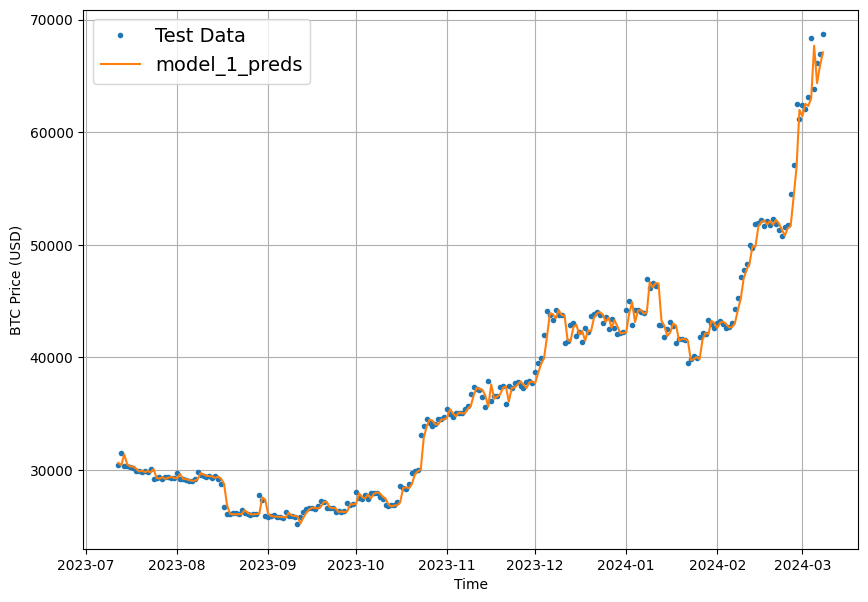

In [48]:
# Plot model 1 preditions
offset = 450
plt.figure(figsize = (10, 7))

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:, 0],
                 start = offset,
                 label = 'Test Data')

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format = '-',
                 label = 'model_1_preds');

In [47]:
# Save model
model_1.save('model_1_dense.keras')

## Model 2: Dense Model (window = 30, horizon = 1)

In [49]:
HORIZON = 1
WINDOW_SIZE = 30

In [50]:
# Make windowed and labeled data
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

len(full_windows), len(full_labels)

(3431, 3431)

In [51]:
# Make train and test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels, test_split = 0.2)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2744, 687, 2744, 687)

In [52]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_2_dense')

# Compile model
model_2.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# Fit model
model_2.fit(train_windows,
            train_labels,
            epochs = 100,
            verbose = 0,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

In [53]:
# Evaluate model
model_2.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 3ms/step - loss: 875.1385 - mae: 875.1385 - mse: 1263608.1250


[875.1384887695312, 875.1384887695312, 1263608.125]

In [54]:
# Load best model
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 562.8151 - mae: 562.8151 - mse: 769406.3125


[562.8151245117188, 562.8151245117188, 769406.3125]

In [55]:
# Make predictions
model_2_preds = make_preds(model_2, test_windows)

22/22 [==============================] - 0s 2ms/step


In [56]:
# Evaluate model 2 predictions
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_2_preds)
model_2_results

{'Mean Absolute Error': 562.8151,
 'Mean Squared Error': 769406.25,
 'Root Mean Squared Error': 877.158,
 'Mean Absolute Percentage Error': 1.9884053,
 'Mean Absolute Scaled Error': 1.0642933}

In [57]:
model_1_results

{'Mean Absolute Error': 529.5472,
 'Mean Squared Error': 722104.56,
 'Root Mean Squared Error': 849.76733,
 'Mean Absolute Percentage Error': 1.842046,
 'Mean Absolute Scaled Error': 1.0004954}

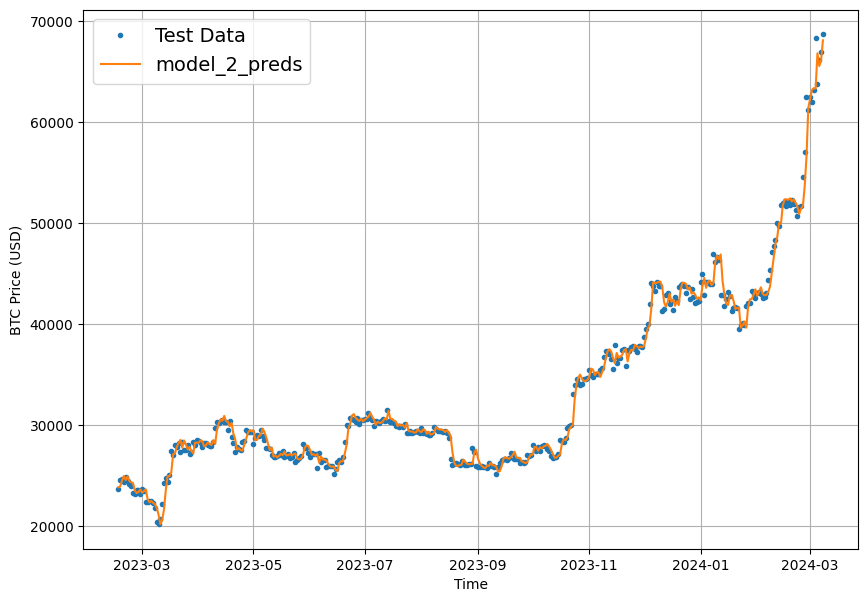

In [58]:
# Plot model 2 predictions
offset = 300

plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:, 0], start = offset, label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows):], values = model_2_preds, start = offset, format = "-", label = "model_2_preds");

In [59]:
# Save
model_2.save('model_2_dense.keras')

## Model 3: Dense Model (window = 30, horizon = 7)

In [60]:
HORIZON = 7
WINDOW_SIZE = 30

In [61]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

len(full_windows), len(full_labels)

(3425, 3425)

In [62]:
# Train and test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels, test_split = 0.2)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2740, 685, 2740, 685)

In [63]:
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_3_dense')

# Compile
model_3.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# Fit the model
model_3.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

In [64]:
# Evaluate model on test data
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense/')
model_3.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 1153.6505 - mae: 1153.6505 - mse: 3452063.2500


[1153.6505126953125, 1153.6505126953125, 3452063.25]

In [65]:
# Make predictions
model_3_preds = make_preds(model_3, test_windows)

model_3_preds[:5]

22/22 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[40255.547, 40010.984, 40455.766, 39994.258, 40735.844, 40193.887,
        40742.33 ],
       [40943.61 , 40262.207, 40925.117, 40103.195, 40519.188, 40930.445,
        40960.14 ],
       [41679.242, 41198.93 , 40924.617, 40504.027, 41522.8  , 40925.246,
        41192.777],
       [41932.332, 41355.723, 41783.984, 40797.098, 41237.336, 41327.31 ,
        41295.56 ],
       [41269.6  , 41032.594, 41003.35 , 40838.406, 40552.594, 40588.66 ,
        41282.77 ]], dtype=float32)>

In [66]:
# Result model 3
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)

model_3_results

{'Mean Absolute Error': 1153.6505,
 'Mean Squared Error': 3452062.8,
 'Root Mean Squared Error': 1324.1526,
 'Mean Absolute Percentage Error': 4.060296,
 'Mean Absolute Scaled Error': 2.2126484}

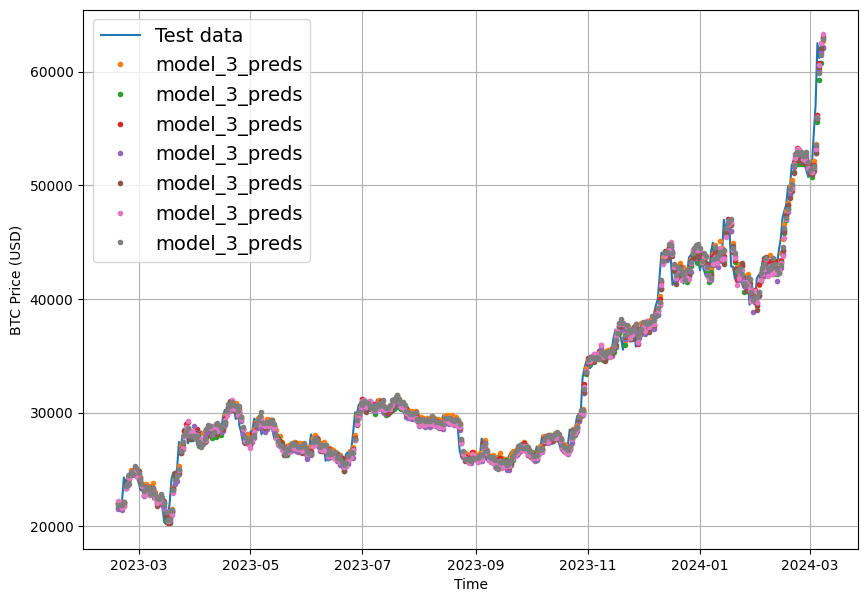

In [67]:
# PLot predictions
offset = 300
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:, 0], start = offset, format = "-", label = "Test data")
plot_time_series(timesteps = X_test[-len(test_windows):], values = model_3_preds, start = offset, label = "model_3_preds");

In [68]:
# Save
model_3.save('model_3_dense.keras')

## Summary Dense Models

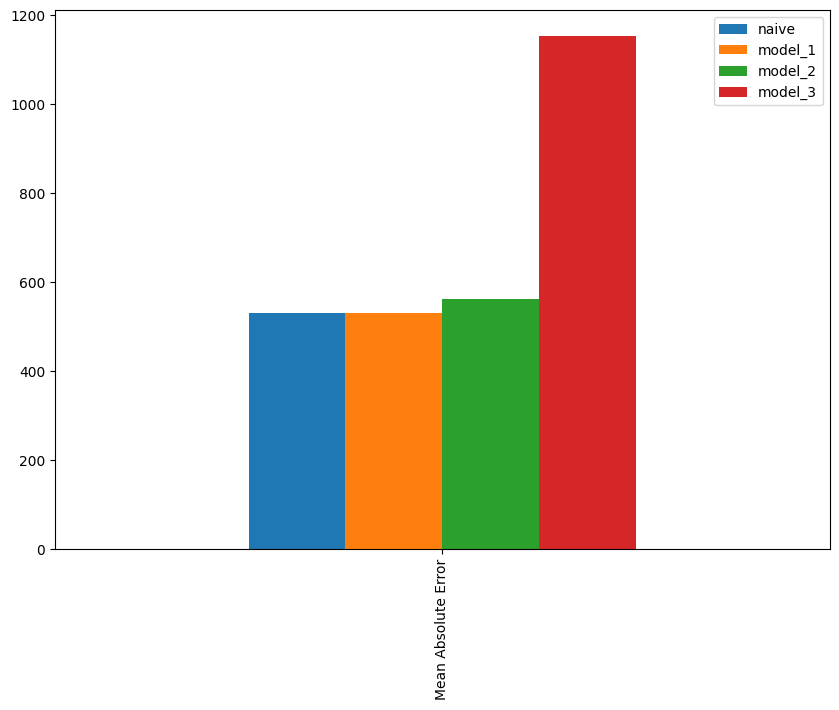

In [69]:
pd.DataFrame({
    'naive': naive_results['Mean Absolute Error'],
    'model_1': model_1_results['Mean Absolute Error'],
    'model_2': model_2_results['Mean Absolute Error'],
    'model_3': model_3_results['Mean Absolute Error']
}, index = ['Mean Absolute Error']).plot(figsize = (10, 7), kind = 'bar');

## Model 4: Conv1D Neural Network

In [70]:
HORIZON = 1
WINDOW_SIZE = 7

In [71]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

len(full_windows), len(full_labels)

(3454, 3454)

In [72]:
# Create train and test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels, test_split = 0.2)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2763, 691, 2763, 691)

In [73]:
# Shape of train data
train_windows[0].shape, train_labels[0].shape

((7,), (1,))

In [74]:
# Test reshaping
tmp = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(tmp, axis = 1))

print(f'Original shape: {tmp.shape}')
print(f'Expanded shape: {expand_dims_layer(tmp).shape}')
print(f'Original values with expanded shape:\n {expand_dims_layer(tmp)}')

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[457.334015]
 [424.440002]
 [394.79599 ]
 [408.903992]
 [398.821014]
 [402.152008]
 [435.790985]]


In [75]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    layers.Conv1D(filters = 128, kernel_size = 5, padding = 'causal', activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_4_conv1d')

# Compile
model_4.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)])

In [76]:
# Summarize
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
# Evaluate
model_4 = tf.keras.models.load_model('model_experiments/model_4_conv1d/')
model_4.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 4ms/step - loss: 535.6953 - mae: 535.6953 - mse: 721314.1250


[535.6953125, 535.6953125, 721314.125]

In [78]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:5]

22/22 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([40011.07 , 40669.594, 41374.82 , 41580.246, 40784.418],
      dtype=float32)>

In [79]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_4_preds)
model_4_results

{'Mean Absolute Error': 535.69525,
 'Mean Squared Error': 721314.06,
 'Root Mean Squared Error': 849.30206,
 'Mean Absolute Percentage Error': 1.878142,
 'Mean Absolute Scaled Error': 1.0121112}

In [80]:
# Save model
model_4.save('model_4_conv1d.keras')

## Model 5: Recurent Neural Network LSTM

In [81]:
train_windows[:5], train_labels[:5], train_windows[0].shape, train_labels[0].shape

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]),
 array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]),
 (7,),
 (1,))

In [82]:
tf.random.set_seed(42)

# Build a model
inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
x = layers.LSTM(128, activation = 'relu')(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs = inputs, outputs = output, name = 'model_5_lstm')

# Compile
model_5.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# Fit
model_5.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])

In [83]:
# Evaluate on test data
model_5 = tf.keras.models.load_model('model_experiments/model_5_lstm/')
model_5.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 546.8004 - mae: 546.8004 - mse: 751390.8750


[546.8003540039062, 546.8003540039062, 751390.875]

In [84]:
# Make predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

22/22 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([40005.223, 40561.496, 41283.246, 41501.38 , 40931.785],
      dtype=float32)>

In [85]:
# Evaluiate predictions
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_5_preds)
model_5_results

{'Mean Absolute Error': 546.80035,
 'Mean Squared Error': 751390.8,
 'Root Mean Squared Error': 866.828,
 'Mean Absolute Percentage Error': 1.9226166,
 'Mean Absolute Scaled Error': 1.0330925}

In [86]:
# Save
model_5.save('model_5_lstm.keras')

### Multivariate time series dataset - Halving

In [87]:
bitcoin_price.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [88]:
bitcoin_price.index[0], bitcoin_price.index[-1]

(Timestamp('2014-09-17 00:00:00'), Timestamp('2024-03-08 00:00:00'))

In [89]:
# Add halving events
block_reward_1 = 50 # 3.01.2009 - this reward isn't in dataset
block_reward_2 = 25 # 28.11.2012
block_reward_3 = 12.5 # 9.7.2016
block_reward_4 = 6.25 # 18.5.2020
block_reward_5 = 3.125 # 19.04.2024 - this reward isn't in dataset

# Block reward dates
block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')
block_reward_5_datetime = np.datetime64('2024-04-19')

In [90]:
# Create ranges
block_reward_2_days = (block_reward_3_datetime - bitcoin_price.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_price.index[0]).days

block_reward_2_days, block_reward_3_days

(661, 2070)

In [91]:
# Add another column to our DataFrame
bitcoin_prices_block = bitcoin_price.copy()
bitcoin_prices_block['block_reward'] = None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-09-17,457.334015,25
2014-09-18,424.440002,25
2014-09-19,394.795990,25
2014-09-20,408.903992,25
2014-09-21,398.821014,25


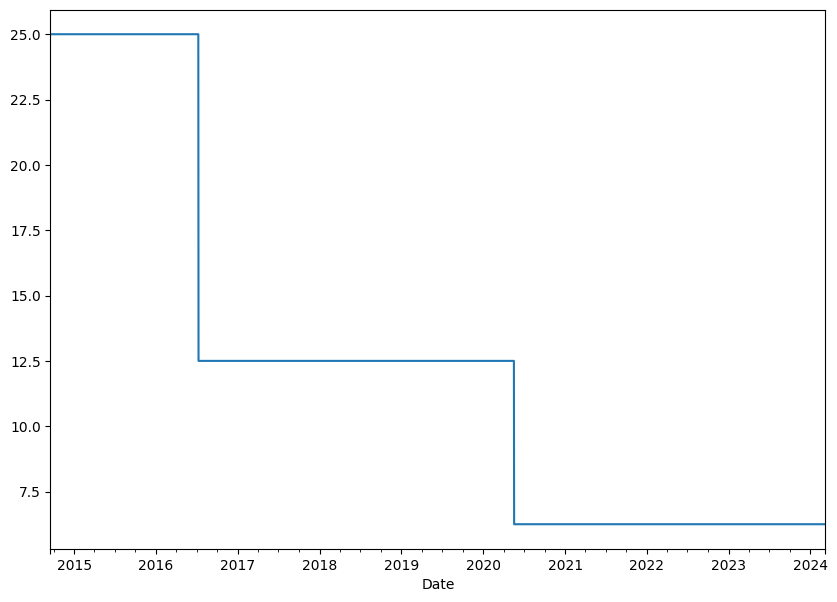

In [92]:
bitcoin_prices_block['block_reward'].plot(figsize = (10, 7));

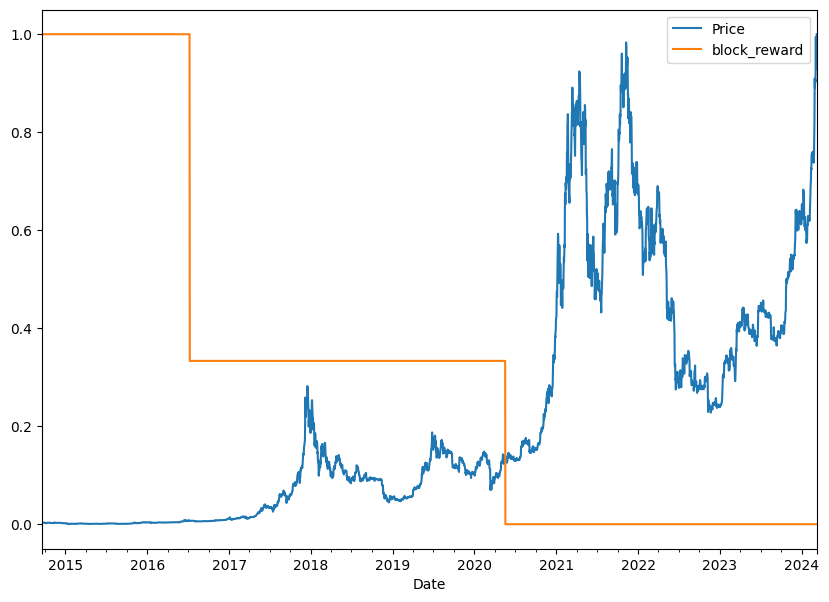

In [93]:
# Add btc price to plot
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', 'block_reward']]),
                                     columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize = (10, 7));

### Windowing dataset

In [94]:
HORIZON = 1
WINDOW_SIZE = 7

In [95]:
# Make a copy of dataframe
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods = i + 1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,25,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,25,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,25,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,25,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


In [96]:
bitcoin_prices_windowed.tail(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2024-02-28,62504.789063,6.25,57085.371094,54522.402344,51733.238281,51571.101563,50731.949219,51304.972656,51839.179688
2024-02-29,61198.382813,6.25,62504.789063,57085.371094,54522.402344,51733.238281,51571.101563,50731.949219,51304.972656
2024-03-01,62440.632813,6.25,61198.382813,62504.789063,57085.371094,54522.402344,51733.238281,51571.101563,50731.949219
2024-03-02,62029.847656,6.25,62440.632813,61198.382813,62504.789063,57085.371094,54522.402344,51733.238281,51571.101563
2024-03-03,63167.371094,6.25,62029.847656,62440.632813,61198.382813,62504.789063,57085.371094,54522.402344,51733.238281
2024-03-04,68330.414063,6.25,63167.371094,62029.847656,62440.632813,61198.382813,62504.789063,57085.371094,54522.402344
2024-03-05,63801.199219,6.25,68330.414063,63167.371094,62029.847656,62440.632813,61198.382813,62504.789063,57085.371094
2024-03-06,66106.804688,6.25,63801.199219,68330.414063,63167.371094,62029.847656,62440.632813,61198.382813,62504.789063
2024-03-07,66925.484375,6.25,66106.804688,63801.199219,68330.414063,63167.371094,62029.847656,62440.632813,61198.382813


In [97]:
# Create X and y
X = bitcoin_prices_windowed.dropna().drop('Price', axis = 1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [98]:
y.head()

Date
2014-09-24    423.204987
2014-09-25    411.574005
2014-09-26    404.424988
2014-09-27    399.519989
2014-09-28    377.181000
Name: Price, dtype: float32

In [99]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2763, 691, 2763, 691)

## Model 6: Multivariete Dense Model

In [100]:
tf.random.set_seed(42)

# Create model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_6_dense_multivariate')

# Compile
model_6.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# Fit the model
model_6.fit(X_train,
              y_train,
              epochs = 100,
              verbose = 0,
              batch_size = 128,
              validation_data = (X_test, y_test),
              callbacks = [create_model_checkpoint(model_name = model_6.name)])

In [101]:
# Evaluate model
model_6 = tf.keras.models.load_model('model_experiments/model_6_dense_multivariate/')
model_6.evaluate(X_test, y_test)

22/22 [==============================] - 0s 2ms/step - loss: 531.0865 - mae: 531.0865 - mse: 720707.6875


[531.0864868164062, 531.0864868164062, 720707.6875]

In [102]:
# Make predictions
model_6_preds = make_preds(model_6, X_test)
model_6_preds[:5]

22/22 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([39882.113, 40594.14 , 41382.1  , 41502.824, 40752.137],
      dtype=float32)>

In [103]:
# Evaluate predictions
model_6_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_6_preds)
model_6_results

{'Mean Absolute Error': 531.0865,
 'Mean Squared Error': 720707.7,
 'Root Mean Squared Error': 848.94507,
 'Mean Absolute Percentage Error': 1.8556118,
 'Mean Absolute Scaled Error': 1.0034037}

In [104]:
naive_results

{'Mean Absolute Error': 530.3807,
 'Mean Squared Error': 723649.7,
 'Root Mean Squared Error': 850.676,
 'Mean Absolute Percentage Error': 1.8382432,
 'Mean Absolute Scaled Error': 1.0004836}

In [105]:
model_1_results

{'Mean Absolute Error': 529.5472,
 'Mean Squared Error': 722104.56,
 'Root Mean Squared Error': 849.76733,
 'Mean Absolute Percentage Error': 1.842046,
 'Mean Absolute Scaled Error': 1.0004954}

In [106]:
model_2_results

{'Mean Absolute Error': 562.8151,
 'Mean Squared Error': 769406.25,
 'Root Mean Squared Error': 877.158,
 'Mean Absolute Percentage Error': 1.9884053,
 'Mean Absolute Scaled Error': 1.0642933}

In [107]:
# Save
model_6.save('model_6_multivariete_dense.keras')

## N-BEATS Algorithm

### Build the N-BEASTS block layer

In [108]:
# Create custom layer
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                 input_size: int,
                 theta_size: int,
                 horizon: int,
                 n_neurons: int,
                 n_layers: int,
                 **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        # Block contains stack of 4 fully connected layers each has ReLU activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation = 'relu') for _ in range(n_layers)]
        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation = 'linear', name = 'theta')

    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)

        # Output the backcast and the forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]

        return backcast, forecast

In [109]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)

dummy_nbeats_block_layer = NBeatsBlock(input_size = WINDOW_SIZE,
                                       theta_size = WINDOW_SIZE + HORIZON,
                                       horizon = HORIZON,
                                       n_neurons = 128,
                                       n_layers = 4)

# Create dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis = 0)

# Pass dummy inputs through dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

print(f'Backcast: {tf.squeeze(backcast).numpy()}')
print(f'Forecast: {tf.squeeze(forecast).numpy()}')

Backcast: [-1.2441127   0.25822774 -0.08366065 -0.31587663 -0.33577403 -0.05405141
 -0.01065478]
Forecast: -0.5973089933395386


### Prepare data

In [110]:
HORIZON = 1
WINDOW_SIZE = 7

In [111]:
bitcoin_price.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [112]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_price.copy()

for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f'Price+{i+1}'] = bitcoin_prices_nbeats['Price'].shift(periods = i + 1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-17,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [113]:
# Create X and y
X = bitcoin_prices_nbeats.dropna().drop('Price', axis = 1).astype(np.float32)
y = bitcoin_prices_nbeats.dropna()['Price']

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2763, 691, 2763, 691)

In [114]:
# Make dataset performant
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Hyperparameters

In [115]:
# Values from original paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Residual connections

In [116]:
# Test
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Print
print(f'Input tensors: {tensor_1.numpy()} and {tensor_2.numpy()}')
print(f'Subtracted: {subtracted.numpy()}')
print(f'Added: {added.numpy()}')

Input tensors: [10 11 12 13 14 15 16 17 18 19] and [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Modelling N-BEATS

In [124]:
tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
n_beats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                  theta_size = THETA_SIZE,
                                  horizon = HORIZON,
                                  n_neurons = N_NEURONS,
                                  n_layers = N_LAYERS,
                                  name = 'initial_block')

# 2. Create input to stack
stack_input = layers.Input(shape = (INPUT_SIZE), name = 'stack_input')

# 3. Create initial backcast and forecast input
residuals, forecast = n_beats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS - 1)): # -1 because we've already created one block layer
    # 5. Use NBeatsBlock to calculate backcase as well as the forecast
    backcast, forecast = NBeatsBlock(input_size = INPUT_SIZE,
                                     theta_size = THETA_SIZE,
                                     horizon = HORIZON,
                                     n_neurons = N_NEURONS,
                                     n_layers = N_LAYERS,
                                     name = f'n_beats_block_{i}')(residuals)
    # 6. Create double residual stacking
    residuals = layers.subtract([residuals, backcast], name = f'subtract_{i}')
    forecast = layers.add([forecast, forecast], name = f'add_{i}')

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs = stack_input, outputs = forecast, name = 'model_7_nbeats')

# 8. Compile the model
model_7.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# 9. Fit the model
model_7.fit(train_dataset,
            epochs = N_EPOCHS,
            validation_data = test_dataset,
            verbose = 0,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                          patience = 200,
                                                          restore_best_weights = True),
                         tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                             patience = 100,
                                                             verbose = 1)])


Epoch 1143: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1883: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1983: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.


In [125]:
# Evaluate model on test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 47ms/step - loss: 527.2212 - mae: 527.2212 - mse: 709996.6250


[527.22119140625, 527.22119140625, 709996.625]

In [126]:
# Make predictions
model_7_preds = model_7.predict(test_dataset)
model_7_preds[:5]

1/1 [==============================] - 1s 1s/step


array([[39782.14 ],
       [40670.117],
       [41455.61 ],
       [41424.76 ],
       [40661.86 ]], dtype=float32)

In [187]:
y_test.shape, tf.squeeze(model_7_preds).shape

((691,), TensorShape([691]))

In [188]:
# Evaluate model predictions
model_7_results = evaluate_preds(y_true = y_test,
                                 y_pred = tf.squeeze(model_7_preds))
model_7_results

{'Mean Absolute Error': 527.2212,
 'Mean Squared Error': 709996.6,
 'Root Mean Squared Error': 842.613,
 'Mean Absolute Percentage Error': 1.8363131,
 'Mean Absolute Scaled Error': 0.9961008}

In [128]:
model_6_results

{'Mean Absolute Error': 531.0865,
 'Mean Squared Error': 720707.7,
 'Root Mean Squared Error': 848.94507,
 'Mean Absolute Percentage Error': 1.8556118,
 'Mean Absolute Scaled Error': 1.0034037}

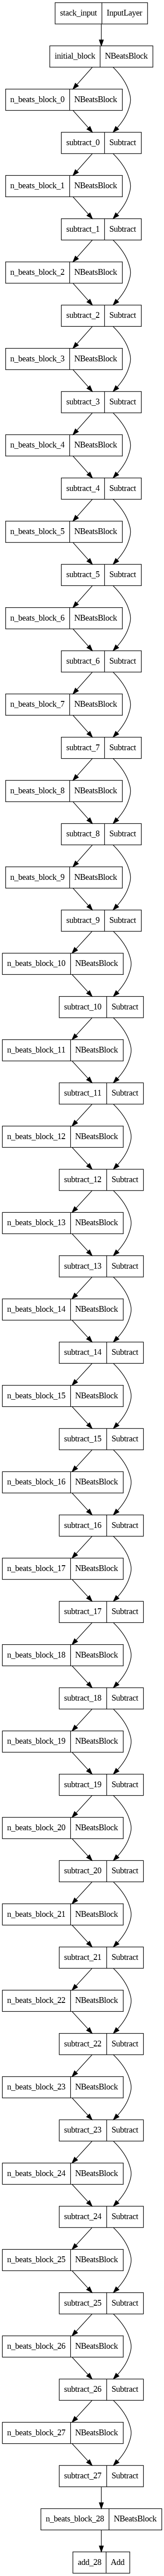

In [129]:
# Plot model
from tensorflow.keras.utils import plot_model

plot_model(model_7)

In [130]:
# Save model
model_7.save('model_7_nbeats.keras')

## Model 8: Ensemble Model

In [131]:
def get_ensemble_models(horizon = HORIZON,
                        train_data = train_dataset,
                        test_data = test_dataset,
                        num_iter = 10,
                        num_epochs = 1000,
                        loss_fns = ['mae', 'mse', 'mape']):
  '''
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter = 10, a list of 30 trained models will be returend:
  10 * len(['mae', 'mse', 'mape']).
  '''
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iterm number of models perf loss function
  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f'Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}')

      # Create model and initialize dense layers with normal distribution for estimating prediction intervals later on
      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer = 'he_normal', activation = 'relu'),
          layers.Dense(128, kernel_initializer = 'he_normal', activation = 'relu'),
          layers.Dense(horizon)
      ])

      # Compile
      model.compile(loss = loss_function,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ['mae', 'mse'])

      # Fit the current model
      model.fit(train_data,
                epochs = num_epochs,
                validation_data = test_data,
                verbose = 0,
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                              patience = 200,
                                                              restore_best_weights = True),
                             tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                                  patience = 100,
                                                                  verbose = 1)])

      # Append fitted model
      ensemble_models.append(model)

  return ensemble_models

In [132]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter = 5,
                                      num_epochs = 1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 350: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 284: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 391: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 491: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 201: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 927: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 563: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 664: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 764: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing 

### Make Predictions

In [133]:
ensemble_models

In [134]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [135]:
# Create list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models = ensemble_models,
                                     data = test_dataset)
ensemble_preds

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 42ms/step


<tf.Tensor: shape=(15, 691), dtype=float32, numpy=
array([[39692.48 , 40729.22 , 41520.91 , ..., 64265.566, 66128.18 ,
        67135.45 ],
       [39549.56 , 40838.11 , 41502.71 , ..., 64961.285, 66181.05 ,
        66745.97 ],
       [39761.94 , 40840.117, 41484.227, ..., 64021.535, 66589.84 ,
        66683.07 ],
       ...,
       [39664.707, 40683.83 , 41418.125, ..., 64050.81 , 66240.5  ,
        66292.984],
       [39879.293, 40473.062, 41563.727, ..., 64561.863, 65974.9  ,
        67135.98 ],
       [39720.234, 40856.457, 41393.54 , ..., 63991.477, 66426.09 ,
        66626.375]], dtype=float32)>

In [137]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis = 0)
ensemble_median = np.median(ensemble_preds, axis = 0)

In [138]:
# Evaluate predictions
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_mean)
ensemble_results

{'Mean Absolute Error': 528.5196,
 'Mean Squared Error': 710274.75,
 'Root Mean Squared Error': 842.778,
 'Mean Absolute Percentage Error': 1.8411758,
 'Mean Absolute Scaled Error': 0.99855393}

In [139]:
# Evaluate predictions
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_median)
ensemble_results

{'Mean Absolute Error': 530.16736,
 'Mean Squared Error': 712245.6,
 'Root Mean Squared Error': 843.9465,
 'Mean Absolute Percentage Error': 1.8458035,
 'Mean Absolute Scaled Error': 1.0016671}

### Plotting the Prediction Intervals

In [140]:
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds, axis = 0)
  interval = 1.96 * std
  preds_mean = tf.reduce_mean(preds, axis = 0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

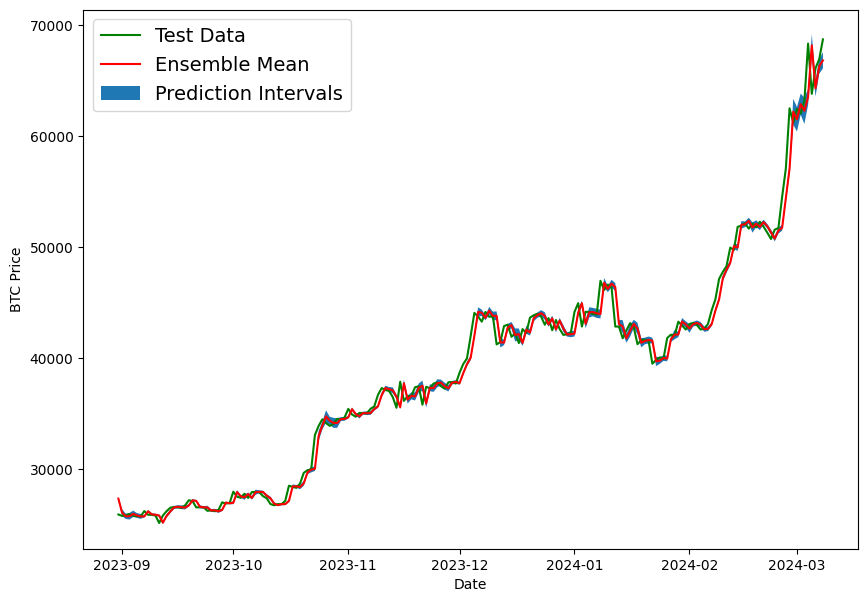

In [143]:
# Get bounds of the 95% prediction interval
lower, upper = get_upper_lower(preds = ensemble_preds)

ensemble_mean = tf.reduce_mean(ensemble_preds, axis = 0)

offset = 500
plt.figure(figsize = (10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], 'g', label = 'Test Data')
plt.plot(X_test.index[offset:], ensemble_mean[offset:], 'r', label = 'Ensemble Mean')
plt.xlabel('Date')
plt.ylabel('BTC Price')

plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label = 'Prediction Intervals')

plt.legend(loc = 'upper left', fontsize = 14);

In [147]:
# Save models
import joblib
models_dict = {f'model_{i}': model for i, model in enumerate(ensemble_models)}
joblib.dump(models_dict, 'model_8_ensemble.joblib')

['model_8_ensemble.joblib']

## Model 9: Train a Model on the Hull Historical Data to Make Predictions Into the Future

In [148]:
HORIZON = 1
WINDOW_SIZE = 7

In [149]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [150]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2024-03-04,68330.414063,6.25,63167.371094,62029.847656,62440.632813,61198.382813,62504.789063,57085.371094,54522.402344
2024-03-05,63801.199219,6.25,68330.414063,63167.371094,62029.847656,62440.632813,61198.382813,62504.789063,57085.371094
2024-03-06,66106.804688,6.25,63801.199219,68330.414063,63167.371094,62029.847656,62440.632813,61198.382813,62504.789063
2024-03-07,66925.484375,6.25,66106.804688,63801.199219,68330.414063,63167.371094,62029.847656,62440.632813,61198.382813
2024-03-08,68707.796875,6.25,66925.484375,66106.804688,63801.199219,68330.414063,63167.371094,62029.847656,62440.632813


In [151]:
# Make X and y
X_all = bitcoin_prices_windowed.dropna().drop(['Price', 'block_reward'], axis = 1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()

len(X_all), len(y_all)

(3454, 3454)

In [152]:
X_all[:5], y_all[:5]

(array([[435.790985, 402.152008, 398.821014, 408.903992, 394.79599 ,
         424.440002, 457.334015],
        [423.204987, 435.790985, 402.152008, 398.821014, 408.903992,
         394.79599 , 424.440002],
        [411.574005, 423.204987, 435.790985, 402.152008, 398.821014,
         408.903992, 394.79599 ],
        [404.424988, 411.574005, 423.204987, 435.790985, 402.152008,
         398.821014, 408.903992],
        [399.519989, 404.424988, 411.574005, 423.204987, 435.790985,
         402.152008, 398.821014]]),
 array([423.204987, 411.574005, 404.424988, 399.519989, 377.181   ]))

In [153]:
# Turn data into efficient tensors
feature_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine
dataset_all = tf.data.Dataset.zip((feature_dataset_all, labels_dataset_all))

# Batch and prefetch
dataset_all = dataset_all.batch(1024).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [154]:
tf.random.set_seed(42)

# Create model
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_9_future_model')

# Compile
model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam())

# Fit the model
model_9.fit(dataset_all,
            epochs = 100,
            verbose = 0)

In [155]:
INTO_FUTURE = 14

In [156]:
def make_future_forecast(values, model, into_future, window_size = WINDOW_SIZE) -> list:
  '''
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  '''
  # Create an empty list
  future_forecast = []
  last_window = values[-window_size:]

  for _ in range(into_future):
    future_pred = model.predict(tf.expand_dims(last_window, axis = 0))
    print(f'Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n')

    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window
    last_window = np.append(last_window, future_pred)[-window_size:]

  return future_forecast

In [157]:
# Make forecast
future_forecast = make_future_forecast(values = y_all,
                                       model = model_9,
                                       into_future = INTO_FUTURE,
                                       window_size = WINDOW_SIZE)

1/1 [==============================] - 0s 136ms/step
Predicting on:
 [62029.847656 63167.371094 68330.414063 63801.199219 66106.804688
 66925.484375 68707.796875] -> Prediction: 63377.5703125

1/1 [==============================] - 0s 99ms/step
Predicting on:
 [63167.371094  68330.414063  63801.199219  66106.804688  66925.484375
 68707.796875  63377.5703125] -> Prediction: 65479.4765625

1/1 [==============================] - 0s 60ms/step
Predicting on:
 [68330.414063  63801.199219  66106.804688  66925.484375  68707.796875
 63377.5703125 65479.4765625] -> Prediction: 66512.3671875

1/1 [==============================] - 0s 20ms/step
Predicting on:
 [63801.199219  66106.804688  66925.484375  68707.796875  63377.5703125
 65479.4765625 66512.3671875] -> Prediction: 65366.1796875

1/1 [==============================] - 0s 18ms/step
Predicting on:
 [66106.804688  66925.484375  68707.796875  63377.5703125 65479.4765625
 66512.3671875 65366.1796875] -> Prediction: 66686.1015625

1/1 [========

### Plot Future Forecast

In [167]:
bitcoin_price['Price'][-1]

68707.796875

In [158]:
future_forecast

[63377.57,
 65479.477,
 66512.37,
 65366.18,
 66686.1,
 66095.5,
 65951.15,
 64807.508,
 65934.57,
 66007.82,
 65749.49,
 66001.4,
 65507.25,
 65512.402]

In [159]:
def get_future_dates(start_date, into_future, offset = 1):
  '''
    Returns array of datetime values ranging from start_date to start_date+into_future.
  '''
  start_date = start_date + np.timedelta64(offset, 'D')
  end_date = start_date + np.timedelta64(into_future, 'D')
  return np.arange(start_date, end_date, dtype = 'datetime64[D]')

In [160]:
# Last timestep of timesteps
last_timestep = bitcoin_price.index[-1]
last_timestep

Timestamp('2024-03-08 00:00:00')

In [161]:
# Get next twoo weeks of timesteps
next_time_steps = get_future_dates(start_date = last_timestep,
                                   into_future = INTO_FUTURE)
next_time_steps

array(['2024-03-09', '2024-03-10', '2024-03-11', '2024-03-12',
       '2024-03-13', '2024-03-14', '2024-03-15', '2024-03-16',
       '2024-03-17', '2024-03-18', '2024-03-19', '2024-03-20',
       '2024-03-21', '2024-03-22'], dtype='datetime64[D]')

In [168]:
# Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, bitcoin_price['Price'][-1])
next_time_steps, future_forecast

(array(['2024-03-08', '2024-03-08', '2024-03-08', '2024-03-09',
        '2024-03-10', '2024-03-11', '2024-03-12', '2024-03-13',
        '2024-03-14', '2024-03-15', '2024-03-16', '2024-03-17',
        '2024-03-18', '2024-03-19', '2024-03-20', '2024-03-21',
        '2024-03-22'], dtype='datetime64[D]'),
 array([68707.8  , 63377.57 , 65479.477, 66512.37 , 65366.18 , 66686.1  ,
        66095.5  , 65951.15 , 64807.508, 65934.57 , 66007.82 , 65749.49 ,
        66001.4  , 65507.25 , 65512.402], dtype=float32))

In [171]:
next_time_steps.shape, future_forecast.shape

((17,), (15,))

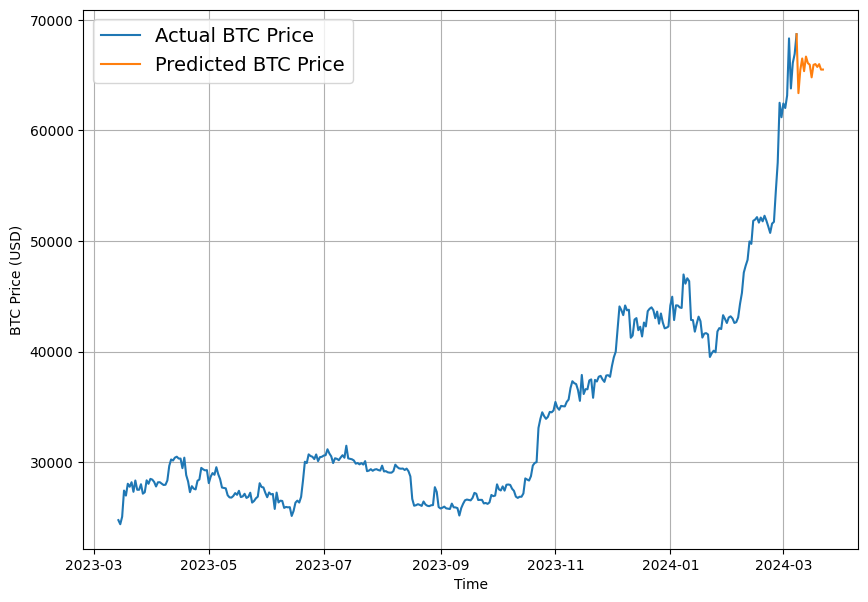

In [178]:
# Plot it
plt.figure(figsize = (10, 7))
plot_time_series(bitcoin_price.index, bitcoin_price['Price'], start = 3100, format = '-', label = 'Actual BTC Price')
plot_time_series(next_time_steps[2:], future_forecast, format = '-', label = 'Predicted BTC Price');

In [179]:
# Save model
model_9.save('model_9_future_prediction.keras')

## Summary

In [180]:
ensemble_results

{'Mean Absolute Error': 530.16736,
 'Mean Squared Error': 712245.6,
 'Root Mean Squared Error': 843.9465,
 'Mean Absolute Percentage Error': 1.8458035,
 'Mean Absolute Scaled Error': 1.0016671}

In [189]:
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results}).T
model_results.head(10)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Mean Absolute Scaled Error
naive_model,530.380676,7.236497e+05,850.676025,1.838243,1.000484
model_1_dense_w7_h1,529.547180,7.221046e+05,849.767334,1.842046,1.000495
model_2_dense_w30_h1,562.815125,7.694062e+05,877.158020,1.988405,1.064293
model_3_dense_w30_h7,1153.650513,3.452063e+06,1324.152588,4.060296,2.212648
model_4_CONV1D,535.695251,7.213141e+05,849.302063,1.878142,1.012111
model_5_LSTM,546.800354,7.513908e+05,866.828003,1.922617,1.033092
model_6_multivariate,531.086487,7.207077e+05,848.945068,1.855612,1.003404
model_7_NBEATS,527.221191,7.099966e+05,842.612976,1.836313,0.996101
model_8_ensemble,530.167358,7.122456e+05,843.946472,1.845803,1.001667


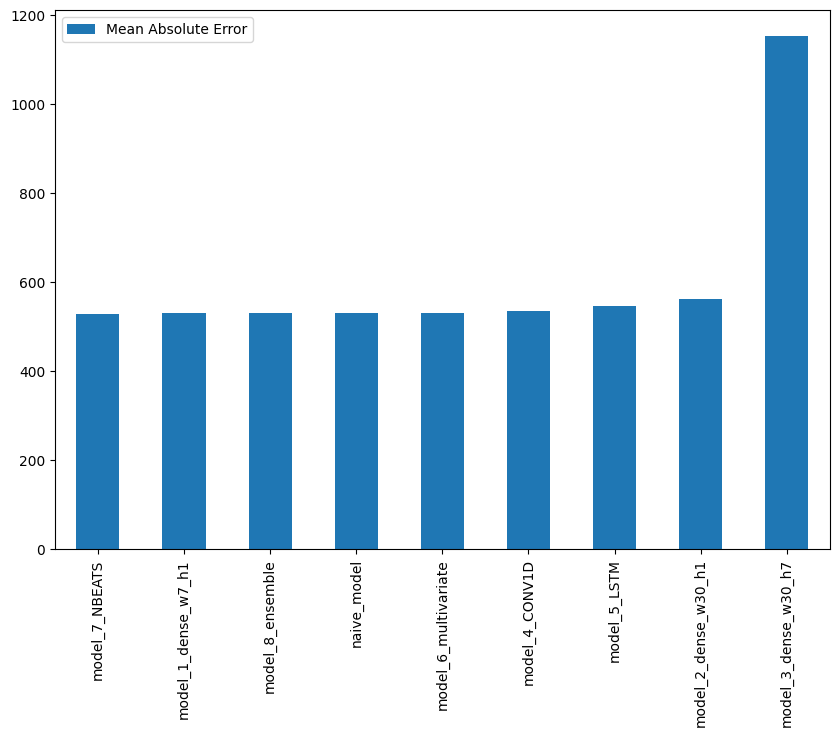

In [190]:
# Sort model results by MAE and plot it
model_results[['Mean Absolute Error']].sort_values(by = 'Mean Absolute Error').plot(figsize = (10, 7), kind = 'bar');